In [ ]:
# !pip3 install opencv-python

# Import libraries

In [ ]:
import os
from PIL import Image
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import yaml
from PIL import Image

# Create directory to put the cleaned data

In [ ]:
def create_directory(parent_directory: str, subdirectory_Name: str, last_subdirectory_Name: str):
    root = "."
    path = f"{root}/{parent_directory}/{subdirectory_Name}/{last_subdirectory_Name}"
    try:
        # Create target Directory
        if os.path.exists(path):
            print("Directory ", path, " already exists")
        else:
            os.makedirs(path)
            print("Directory ", path, " Created ") 
    except FileExistsError:
        print("Directory ", path, " already exists")        

In [ ]:
create_directory("deep_fruits", "images", "train")
create_directory("deep_fruits", "images", "val")
create_directory("deep_fruits", "labels", "train")
create_directory("deep_fruits", "labels", "val")

# Convert all images to jpeg format

In [ ]:
def convert_image_to_jpeg(category: str, file_RGB: str, target_directory: str):
    
    datasets = "datasets"
    deep_fruits = "deep_fruits"
    images = "images"

    
    path_source = f"{datasets}/{category}/{file_RGB}"
    path_target = f"{deep_fruits}/{images}/{target_directory}"
    
    #assuming png
    for image_name in glob.glob(path_source + '/*.png'): 
        title = image_name.split('\\')[1].split('.png')[0]
        im=Image.open(image_name)
        
        #assuming mode RGB
        im = im.convert('RGB') 
        if os.path.exists(path_target):
             # Save image with jpeg type
            im.save(path_target +'/' + title + '.jpeg')
        else:
            print('path', path_target, 'not exist')
        

### Dictionanry of fruits categories

In [ ]:
fruits_categories = {'apple': 0, 'avocado': 1, 'mango': 2, 'orange': 3, 'strawberry': 4, 'rockmelon': 5}

In [ ]:
for category in fruits_categories.keys():
    convert_image_to_jpeg(category, "TRAIN_RGB", "train")
    convert_image_to_jpeg(category, "TEST_RGB", "val")

# Create dataset text format so that it can be used as input for YOLO v5 

In [ ]:
def create_dataset_txt(category: str,c: int, file_txt: str, target_directory: str):
    
    datasets = "datasets"
    deep_fruits = "deep_fruits"
    labels = "labels"


    path = f"{datasets}/{category}/{file_txt}"
    path_target = f"{deep_fruits}/{labels}/{target_directory}"

    f = open(path, "r")
    Lines = f.readlines()
    

    for k, line in enumerate(Lines):
        title = line.strip().split('/')[1].split('.png')[0]

        p = "data_deep_fruits/images/" + target_directory + "/" + title + ".jpeg"
        if not os.path.exists(p):
            continue

        else:
            image_name = Image.open(p)
            width, height = image_name.size
            data_line = line.strip().split('/')[1].split('.png')[1]
            bb = line.strip().split('/')[1].split('.png')[1][1]
            data_list = data_line.split(' ')[2:]

            # writing to file
            file = open(path_target + "/" + title + '.txt', 'w')

            for i in np.arange(0, int(bb)*2, 2):
                line_ith = data_list[3*i: 3*(i+1)+1] # data_list[4*j: 3+(4*j)+1]
                ar = [int(float(item)) for item in line_ith]
                ar[0] = round((ar[0] + ar[2]/2)/width, 2)
                ar[1] = round((ar[1] + ar[3]/2)/height, 2)
                ar[2] = round(ar[2]/width, 2)
                ar[3] = round(ar[3]/height, 2)
                ar = [c] + ar
                listToStr = ' '.join([str(round(elem,2)) for elem in ar])
                file.writelines(listToStr + "\n")
            file.close()

In [ ]:
for key, value in zip(fruits_categories.keys(), fruits_categories.values()):
    create_dataset_txt(key, value, 'train_RGB.txt', 'train')
    create_dataset_txt(key, value, 'test_RGB.txt', 'val')


In [9]:
def cv2_imshow(a, **kwargs):
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

    return plt.imshow(a, **kwargs)

# Example of boundries box for an image

In [56]:
def boundries_box_image(image_name: str, target: str):
    deep_fruits = "deep_fruits"
    images = "images"
    labels = "labels"
    label = "apple"

    path_image = f"{deep_fruits}/{images}/{target}"
    path_image_txt = f"{deep_fruits}/{labels}/{target}"

    # read image
    img = cv2.imread(path_image + '/' + image_name +'.jpeg')
    im_name = Image.open(path_image + '/' + image_name +'.jpeg')
    width, height = im_name.size

    result = img.copy()

    file_txt = open(path_image_txt + '/' + image_name +'.txt', "r")
    lines = file_txt.readlines()
    for l, line in enumerate(lines):
        p = line.strip().split(' ')[1:]
        w = float(p[2])*width
        h = float(p[3])*height
        x = float(p[0])*width - w/2
        y = float(p[1])*height - h/2
        
        cv2.rectangle(result, (int(x), int(y)), (int(w), int(h)), (0, 0, 255), 2)
        cv2.putText(result,label, org=(int(x), int((int(y)+ int(h) * 0.15))), 
          fontFace=cv2.FONT_HERSHEY_PLAIN, fontScale=1.75,
          color=(255, 255, 255),
          thickness=2)

    # show thresh and result    
    cv2_imshow(result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

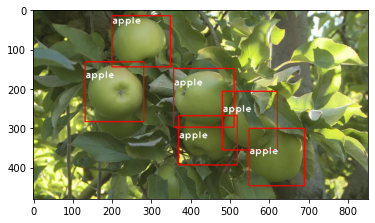

In [57]:
boundries_box_image('1', 'train')

In [45]:
!tree deep_fruits 

Folder PATH listing
Volume serial number is 000000B5 48CF:CEB3
C:\USERS\KHALE\DEEP_FRUITS
ÃÄÄÄimages
³   ÃÄÄÄtrain
³   ÀÄÄÄval
ÀÄÄÄlabels
    ÃÄÄÄtrain
    ÀÄÄÄval
